# Adjaceny Matrices for Global Supply Chain Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

supply_chain = pd.read_csv('./datasets/GSCR_GSPLY.csv')
supply_ref = pd.read_csv('./datasets/GSCR_GSREF.csv')

ticker_usa = set(supply_ref[supply_ref['country'] == 'United States']['ticker'])

RELEVANT_COLUMNS = ['publish_date','supplier_customer_id','supplier_ticker','customer_ticker','revenue_dependency','reporting_period','public_domain_date','accounting_as_of_date','reporting_year']

In [39]:
filter_ref = supply_ref[supply_ref['country'] == 'United States'][['ticker','company_name']]
filter_ref['company_name'] = filter_ref['company_name'].replace(to_replace={'Inc': '',',':'','Company':'','\.':''}, regex=True).str.strip()

correct_tickers = pd.read_csv('./correct_tickers.csv')
filter_ref['ticker'].isin(set(correct_tickers.T.values[0]))

In [66]:
z = filter_ref[filter_ref['ticker'].isin(correct_tickers['ticker'])]
z['combined'] = filter_ref['ticker'] + '~' + filter_ref['company_name']
pd.DataFrame(z['combined'].unique())[0].str.split('~',expand=True).to_csv('./ticker_to_name.csv')

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [48]:
correct_tickers.shape

(422, 1)

# Figure out the relevant american exchanges as our universe of equities

In [2]:
supply_chain['publish_date'] = pd.to_datetime(supply_chain['publish_date'], format='%Y-%m-%d')
supply_chain['public_domain_date'] = pd.to_datetime(supply_chain['public_domain_date'], format='%Y-%m-%d')
supply_chain['supplier_customer_id'] = supply_chain['supplier_ticker'] + ' ' + supply_chain['customer_ticker']

supply_chain.loc[supply_chain['revenue_dependency'] > 1,'revenue_dependency'] = supply_chain.loc[supply_chain['revenue_dependency'] > 1]['revenue_dependency'] / 100

supplier_in_usa = supply_chain.supplier_ticker.isin(ticker_usa)
customer_in_usa = supply_chain.supplier_ticker.isin(ticker_usa)
supply_chain_usa = supply_chain[supplier_in_usa & customer_in_usa] # Filter not used for adj matrix

supply_chain_all = supply_chain
supply_chain_all['public_domain_year'] = supply_chain_all['public_domain_date'].dt.year
supply_chain_all = supply_chain_all[supply_chain_all.public_domain_year > 1970]

2003
2019


Text(0.5,1,'Data Availability')

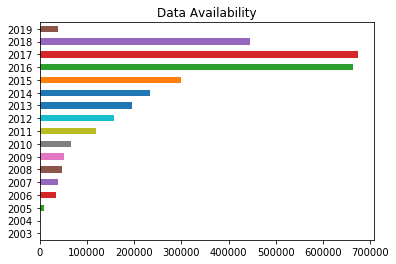

In [3]:
print(supply_chain_all.public_domain_year.min())
print(supply_chain_all.public_domain_year.max())
supply_chain_all.public_domain_year.value_counts().sort_index().plot(kind='barh')
plt.title("Data Availability")

# List of all companies on american exchanges

In [4]:
set(supply_chain_usa.supplier_ticker).intersection(set(supply_chain_usa.customer_ticker))

{'1316',
 'AA',
 'AAPL',
 'ABBV',
 'ABC',
 'ABT',
 'AC',
 'ACA',
 'ACRX',
 'ADBE',
 'ADI',
 'ADM',
 'ADP',
 'ADPT',
 'AES',
 'AET',
 'AGR',
 'AIR',
 'AKS',
 'ALJ',
 'ALM',
 'ALNY',
 'ALSN',
 'ALXN',
 'AMAG',
 'AMAT',
 'AMC',
 'AMD',
 'AMGN',
 'AMID',
 'AMKR',
 'AMRC',
 'AMT',
 'ANDV',
 'ANDX',
 'ANTM',
 'APA',
 'APC',
 'APO',
 'AR',
 'ARIAD PharmaceuticalIAD Pharmaceuticals, Inc.',
 'ARII',
 'ARRS',
 'ASIX',
 'ASRT',
 'AST',
 'ATRO',
 'ATSG',
 'BA',
 'BAH',
 'BAX',
 'BBY',
 'BC',
 'BCC',
 'BCR',
 'BDCO',
 'BDX',
 'BG',
 'BGS',
 'BHE',
 'BHGE',
 'BIIB',
 'BIO',
 'BMY',
 'BOBE',
 'BRK.A',
 'BRS',
 'BXC',
 'C',
 'CA',
 'CACI',
 'CAG',
 'CAH',
 'CALM',
 'CAPL',
 'CAT',
 'CCL',
 'CELG',
 'CEQP',
 'CF',
 'CG',
 'CHGG',
 'CHK',
 'CHRS',
 'CI',
 'CIDM',
 'CIE',
 'CIEN',
 'CLDX',
 'CLMT',
 'CLR',
 'CLX',
 'CMI',
 'CNC',
 'CNGO',
 'CNP',
 'CNX',
 'CNXN',
 'COKE',
 'COL',
 'COMM',
 'COP',
 'CORE',
 'COST',
 'COTY',
 'CPB',
 'CPN',
 'CPS',
 'CPST',
 'CRS',
 'CSC',
 'CSCO',
 'CSL',
 'CSRA',
 'CVGW'

# Build an adjacency matrix for year Y

In [5]:
print(supply_chain_all.columns)

Index(['publish_date', 'public_domain_date', 'accounting_as_of_date',
       'supplier_name', 'supplier_isin', 'supplier_lei', 'supplier_exchange',
       'supplier_ticker', 'customer_name', 'customer_isin', 'customer_lei',
       'customer_exchange', 'customer_ticker', 'reporting_year',
       'reporting_period', 'revenue_dependency',
       'revenue_dependency_annotation', 'supplier_customer_id',
       'public_domain_year'],
      dtype='object')


In [6]:
YEAR = 2016

In [7]:
supply_chain_all_year = supply_chain_all[supply_chain_all['reporting_year'] == YEAR]
supply_chain_all_year = supply_chain_all_year[supply_chain_all_year['reporting_period'] == 99]
supply_chain_all_year[['supplier_customer_id','supplier_ticker','customer_ticker','revenue_dependency','reporting_period','public_domain_date','reporting_year']].head()

,supplier_customer_id,supplier_ticker,customer_ticker,revenue_dependency,reporting_period,public_domain_date,reporting_year
8,8012 LDR,8012,LDR,0.001365,99,2016-12-14,2016
14,8012 7256,8012,7256,0.006156,99,2016-06-24,2016
16,8012 7871,8012,7871,0.001249,99,2016-06-20,2016
24,6112 Pacific Srporation,6112,Pacific Srporation,0.222000,99,2017-02-23,2016
25,"6112 Advanced r Co.,Ltd",6112,"Advanced r Co.,Ltd",0.132000,99,2017-02-23,2016


## First we need to get the earliest published date of the data and discard the rest for each suplier customer id

In [8]:
supply_chain_all_year_first_published = []
for sc_id, sub_df in supply_chain_all_year.groupby('supplier_customer_id'):
    sub_df = sub_df.reset_index()
    min_publish_date = sub_df['publish_date'].idxmin()
    supply_chain_all_year_first_published.append(sub_df.iloc[min_publish_date,:])
    
supply_chain_all_year_first_published = pd.DataFrame(supply_chain_all_year_first_published)
supply_chain_all_year_first_published = supply_chain_all_year_first_published.set_index('index')

In [9]:
supply_chain_matrix_year = supply_chain_all_year_first_published.pivot_table(values='revenue_dependency', index='supplier_ticker', columns='customer_ticker').fillna(0)
supplier_pct = supply_chain_matrix_year.sum(axis=1)

supply_chain_matrix_year_filtered = supply_chain_matrix_year[supplier_pct <= 1]

### Note that there are a very small perecentage of companies where total revenue greater than one, quandl team say the data is sourced from 3rd party and not possible to fix so we discard this small 2% of data

### We also note that there is a lot of missing % revenue out of company total revenue, this could be for many reasons eg. there are no suppliers for some parts of companies revenue generating operations eg. professional services, propietary software etc. 

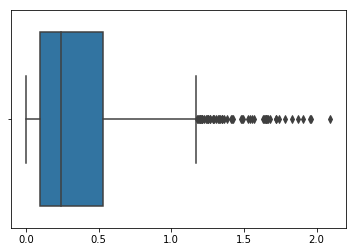

In [10]:
sns.boxplot(supplier_pct)

In [11]:
sum(supplier_pct > 1)/(sum(supplier_pct > 0))

0.01729559748427673

## Building all adjacency matrices

In [12]:
supply_chain_adj_matrices = {}
YEARS = np.arange(2003,2020)

for YEAR in YEARS:
    print(YEAR)
    supply_chain_all_year = supply_chain_all[supply_chain_all['reporting_year'] == YEAR]
    supply_chain_all_year = supply_chain_all_year[supply_chain_all_year['reporting_period'] == 99]
    supply_chain_all_year_first_published = []
    
    for sc_id, sub_df in supply_chain_all_year.groupby('supplier_customer_id'):
        sub_df = sub_df.reset_index()
        min_publish_date = sub_df['publish_date'].idxmin()
        supply_chain_all_year_first_published.append(sub_df.iloc[min_publish_date,:])

    supply_chain_all_year_first_published = pd.DataFrame(supply_chain_all_year_first_published)
    supply_chain_all_year_first_published = supply_chain_all_year_first_published.set_index('index')
    
    supply_chain_matrix_year = supply_chain_all_year_first_published.pivot_table(values='revenue_dependency', index='supplier_ticker', columns='customer_ticker').fillna(0)
    supplier_pct = supply_chain_matrix_year.sum(axis=1)

    supply_chain_matrix_year_filtered = supply_chain_matrix_year[supplier_pct <= 1]
    
    supply_chain_adj_matrices[YEAR] = supply_chain_matrix_year_filtered

2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


In [16]:
for YEAR in supply_chain_adj_matrices:
    supply_chain_adj_matrices[YEAR].to_csv('./adjacency/adj_matrix_%s.csv' % YEAR)

In [18]:
adj_matrix = pd.read_csv('./adjacency/adj_matrix_2017.csv')

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
